PROJECT 2

PART (1) QUESTION (1.1) There are 4039 Nodes and 88234 Edges

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#!pip install igraph

In [ ]:
print(igraph.__version__)

In [2]:

import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

PART (1) QUESTION (1.2) The graph is connected:

In [3]:
path = 'facebook_combined.txt'

# Load file
data = np.loadtxt(path, dtype=int)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['source', 'target'])

# Create graph
g = igraph.Graph.DataFrame(df, directed=False)

# Print the graph summary
print(g.summary())

IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)


In [4]:
# Check if the graph is connected
if g.is_connected():
    print("The graph is connected!")
else:
    print("The graph is not connected!")
        # Get the size of the GCC
    gcc = g.clusters().giant()
    print("The size of the GCC is:", gcc.vcount())

The graph is connected!


PART 1 QUESTION (2)

In [5]:
# Find the diameter of the graph
diameter = g.diameter()
print("The diameter of the graph is:", diameter)

The diameter of the graph is: 8


PART 1 QUESTION (3)

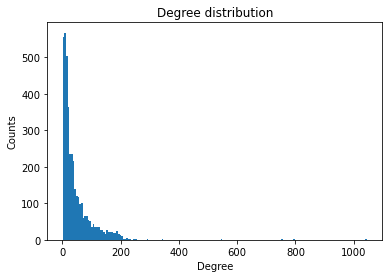

The average degree of the graph is: 43.69101262688784


In [130]:
# Compute the degree of each vertex in the graph
degree = g.degree()

# Compute the degree distribution
degree_dist = g.degree_distribution()

# Plot the degree distribution
plt.hist(degree, 'auto')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Report the average degree
avg_degree = sum(degree) / len(degree)
print("The average degree of the graph is:", avg_degree)

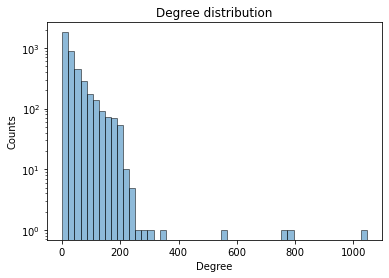

The slope of the linear fit is:  -0.21303107322226497
slope is  -0.2130310732222649


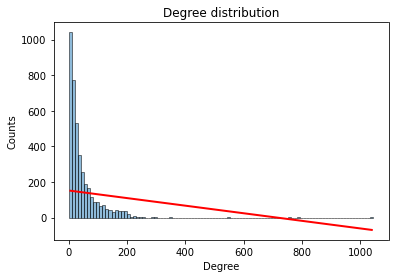

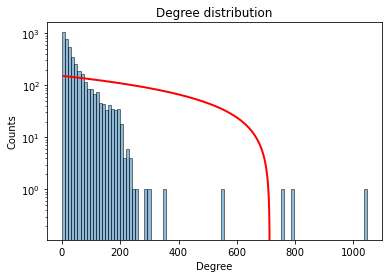

In [6]:
# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=False, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

# Fit a linear model to the log-transformed data
x = bins[:-1] + np.diff(bins) / 2
y = counts
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print("The slope of the linear fit is: ", slope)

# Plot the linear fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, 'r-', lw=2)

# recheck slope
slope = (yfit[100] - yfit[0])/(xfit[100]-xfit[0])
print('slope is ',slope)

plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

plt.plot(xfit, yfit, 'r-', lw=2)

plt.show()

-----------------PART 2--------------------------------

PART 2 QUESTION (5)

In [7]:
node_id = 0
node_neighbors = g.neighbors(node_id)
node_neighbors.append(node_id)
personalized_network = g.induced_subgraph(node_neighbors)

print(personalized_network.summary())

IGRAPH UN-- 348 2866 -- 
+ attr: name (v)


There are 348 Nodes, and 2866 Edges.

PART 2 QUESTION (6)

In [8]:
diameter = personalized_network.diameter()
print(diameter)

2


The upper bound of the diameter is 2, since the network is defined as a node and it's immediate neighbors, then any 2 nodes will be connected by at most 2 edges through node 0.

For the lower bound, if node 0 is connected to all of its neighbors and all of its neighbors are connected to each other, then the lower bound of the diameter is 1.

PART 2 QUESTION (7)

For the upper bound, this would mean that their exists 2 nodes that are not connected to each other but are connected through node 0. So the shortest path between the nodes is 2 edges, making the diameter 2.

For the lower bound, it means that node 0 is directly connected to all of its neighbors, and all of its neighbors are directly connected to each other. The network would be a complete graph, and there is a direct path of length 1 between any two nodes in the personalized network.

Part 2 Question (8)

In [9]:
degrees = g.degree()

# count the number of nodes with degree greater than 200
count = 0
total_deg = 0
for degree in degrees:
    if degree > 200:
        count += 1
        total_deg+= degree
total_deg /= count

In [10]:
count

40

In [11]:
total_deg

279.375

Part 2 Question 9


In [ ]:
!apt install libcairo2-dev
!pip install pycairo

In [12]:
import matplotlib.pyplot as plt

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

In [ ]:
print(igraph.__version__)

In [ ]:
#!pip install python-igraph==0.9.6

In [ ]:
import igraph

In [ ]:
import tqdm

In [13]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]
memberships_fg = []
memberships_im = []
memberships_eb = []
fg = []
eb=[]
im=[]
fg_vc=[]
eb_vc=[]
im_vc = []
pns=[]
for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    pns.append(personal_net)
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg.append(fg_clusters)
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    eb.append(eb_clusters)
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    im.append(im_clusters)
    layout = personal_net.layout("fr")

    #fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    fg_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    eb_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    im_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=fg_color, layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=eb_color, layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=im_color, layout=layout)
    #need help plotting.
    #igraph.plot(fg_clusters, vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, vertex_color=[im_clusters.membership], layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

0
True
IGRAPH UN-- 348 2866 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 0:
Fast-Greedy modularity score: 0.413
Edge-Betweenness modularity score: 0.353
Infomap modularity score: 0.389
107
True
IGRAPH UN-- 1046 27795 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 107:
Fast-Greedy modularity score: 0.436
Edge-Betweenness modularity score: 0.507
Infomap modularity score: 0.508
348
True
IGRAPH UN-- 230 3441 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 348:
Fast-Greedy modularity score: 0.252
Edge-Betweenness modularity score: 0.134
Infomap modularity score: 0.095
483
True
IGRAPH UN-- 232 4525 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 483:
Fast-Greedy modularity score: 0.507
Edge-Betweenness modularity score: 0.489
Infomap modularity score: 0.515
1086
True
IGRAPH UN-- 206 7409 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 1086:
Fast-Greedy mo

In [31]:
layouts = []
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    layouts.append(personal_net.layout("fr"))

In [55]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=fg[i], vertex_size=3, vertex_color=fg_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "core_node_"+str(core_nodes[i])+"_fg.png"
    plt.savefig(string)
    plt.clf()
    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [58]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "core_node_"+str(core_nodes[i])+"_eb.png"
    plt.savefig(string)
    
    plt.clf()
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [70]:
for i in range(len(pns)):
    if i!=4:
        fig, ax = plt.subplots()
        igraph.plot(pns[i], mark_groups=im[i], vertex_size=5, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=ax)
        string = "core_node_"+str(core_nodes[i])+"_im.png"
        plt.savefig(string)
        plt.clf()

    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
pns[0]

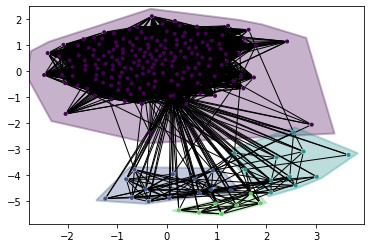

In [75]:
fig, ax = plt.subplots()

igraph.plot(pns[4], mark_groups=im[4], vertex_size=3,edge_arrow_size=.05,vertex_label="", layout=layouts[4],target=ax)
#plt.savefig('test.png')

#igraph.plot(pns[0], mark_groups=eb[0], vertex_size=3, vertex_color=eb_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

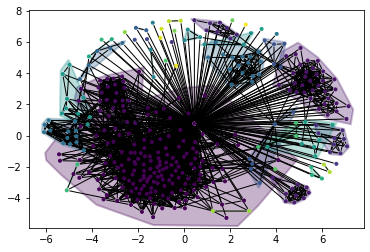

In [42]:
fig, ax = plt.subplots()
igraph.plot(pns[0], mark_groups=eb[0], vertex_size=3, vertex_color=eb_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

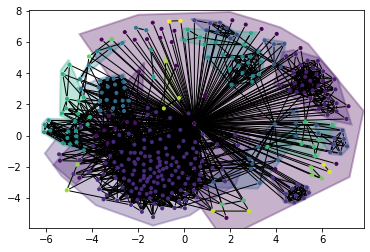

In [41]:
fig, ax = plt.subplots()
igraph.plot(pns[0], mark_groups=im[0], vertex_size=3, vertex_color=im_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

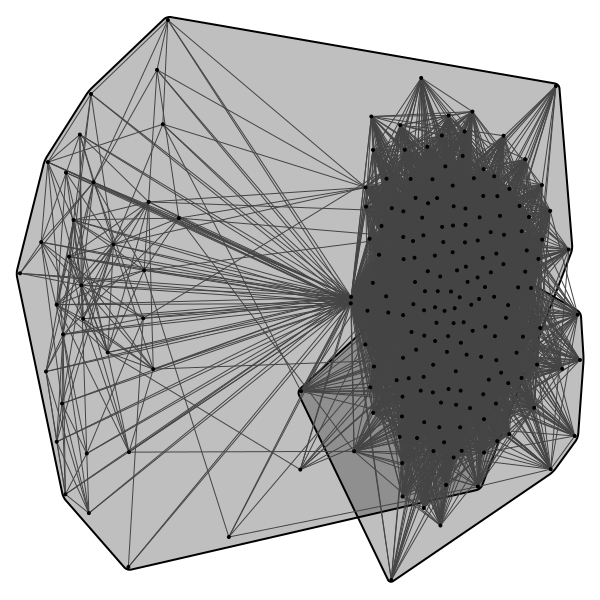

In [16]:
igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_fg.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=eb_clusters, target=f"core_node_{node}_eb.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, target=f"core_node_{node}_im.png", vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_fg.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=eb_clusters, target=f"core_node_{node}_eb.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, target=f"core_node_{node}_im.png", vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

Part 2 Question 10

In [ ]:
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    #temp_g = g.delete_vertices(node)
    #personal_net = g.neighborhood(node, order=1)
    personal_net = g.induced_subgraph(g.neighborhood(node, order=1))

    #personal_net.delete_vertices(node)

    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    igraph.plot(fg_clusters, mark_groups=True)
    igraph.plot(eb_clusters, mark_groups=True)
    igraph.plot(im_clusters, mark_groups=True)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

In [77]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]
memberships_fg = []
memberships_im = []
memberships_eb = []
fg = []
eb=[]
im=[]
fg_vc=[]
eb_vc=[]
im_vc = []
pns=[]
layouts=[]
for node in core_nodes:
    print(node)
    personal_net = g.induced_subgraph(g.neighborhood(node, order=1))
    pns.append(personal_net)
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg.append(fg_clusters)
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    eb.append(eb_clusters)
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    im.append(im_clusters)
    layout = personal_net.layout("fr")
    layouts.append(layout)

    #fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    fg_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    eb_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    im_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=fg_color, layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=eb_color, layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=im_color, layout=layout)
    #need help plotting.
    #igraph.plot(fg_clusters, vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, vertex_color=[im_clusters.membership], layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

0
True
IGRAPH UN-- 348 2866 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 0:
Fast-Greedy modularity score: 0.413
Edge-Betweenness modularity score: 0.353
Infomap modularity score: 0.389
107
True
IGRAPH UN-- 1046 27795 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 107:
Fast-Greedy modularity score: 0.436
Edge-Betweenness modularity score: 0.507
Infomap modularity score: 0.508
348
True
IGRAPH UN-- 230 3441 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 348:
Fast-Greedy modularity score: 0.252
Edge-Betweenness modularity score: 0.134
Infomap modularity score: 0.204
483
True
IGRAPH UN-- 232 4525 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 483:
Fast-Greedy modularity score: 0.507
Edge-Betweenness modularity score: 0.489
Infomap modularity score: 0.515
1086
True
IGRAPH UN-- 206 7409 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 1086:
Fast-Greedy mo

In [78]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=fg[i], vertex_size=3, vertex_color=fg_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_fg.png"
    plt.savefig(string)
    plt.clf()
    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [79]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_eb.png"
    plt.savefig(string)
    
    plt.clf()
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [81]:
for i in range(len(pns)):
    #if i!=4:
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=im[i], vertex_size=5, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_im.png"
    plt.savefig(string)
    plt.clf()

    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Question 11

The embeddedness between the core node and the target node is equal to the degree of the target node plus one.

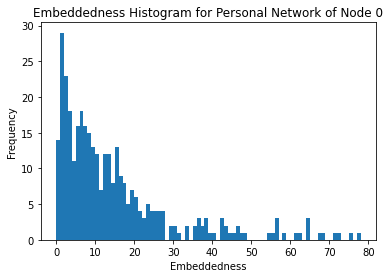

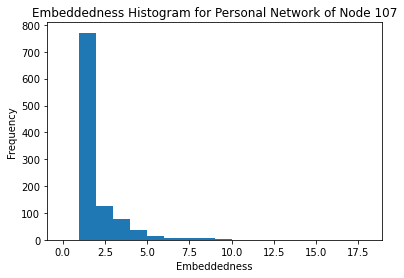

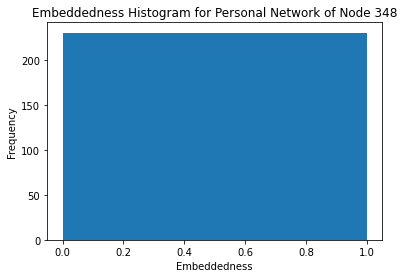

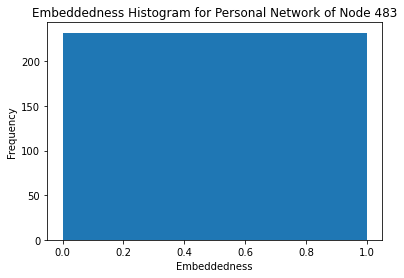

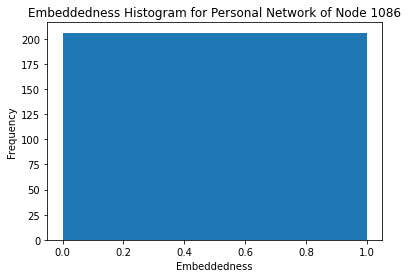

In [35]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    if target in graph.vs.indices and core in graph.vs.indices:
        core_neighbors = set(graph.neighbors(core))
        target_neighbors = set(graph.neighbors(target))
        return core_neighbors.intersection(target_neighbors)
    else:
        return set()

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

# Read the graph from file
# g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]
#core_nodes = [1, 108, 349, 484, 1087]

for core_id in core_nodes:
    personal_net = g.subgraph(g.neighborhood(core_id, order=1))
    personal_nodes = personal_net.vs.indices
    embeddedness_values = []

    for node_id in personal_nodes:
        if node_id != core_id:  # Exclude calculating embeddedness between the same node
            embeddedness_values.append(embeddedness(personal_net, node_id, core_id))

    # Plot the embeddedness histogram for the personal network
    plt.hist(embeddedness_values, bins=range(0, max(embeddedness_values) + 2))
    plt.title(f"Embeddedness Histogram for Personal Network of Node {core_id}")
    plt.xlabel("Embeddedness")
    plt.ylabel("Frequency")
    plt.show()


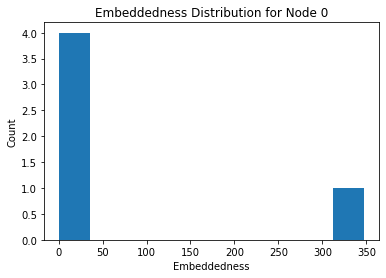

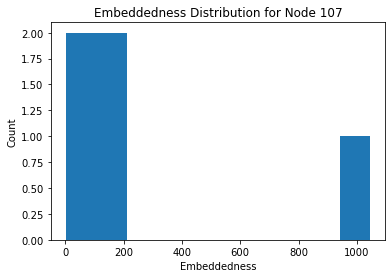

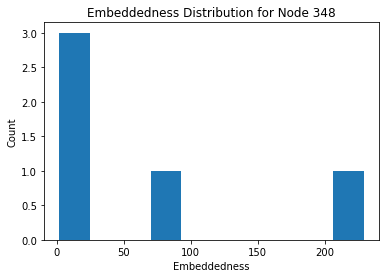

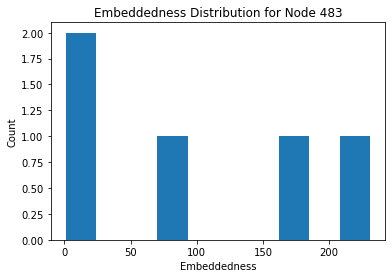

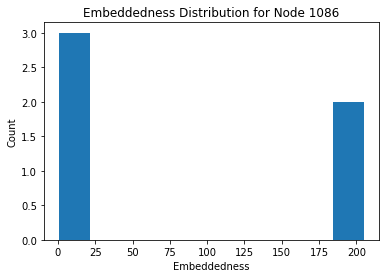

In [6]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]

for node_id in core_nodes:
    node = g.vs[node_id]  # Get the Vertex object
    embeddedness_values = []
    for core_id in core_nodes:
        core = g.vs[core_id]  # Get the Vertex object for core node
        node_embeddedness = embeddedness(g, node, core)
        embeddedness_values.append(node_embeddedness)
    
    # Plot the embeddedness distribution for the current node
    plt.hist(embeddedness_values)
    plt.title(f"Embeddedness Distribution for Node {node_id}")
    plt.xlabel("Embeddedness")
    plt.ylabel("Count")
    plt.show()


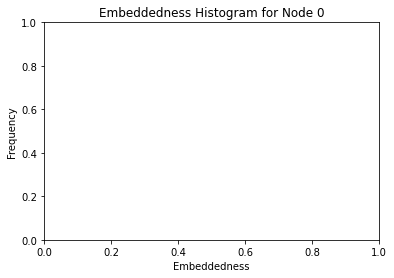

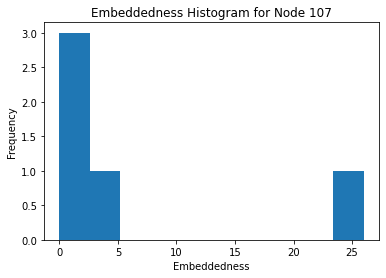

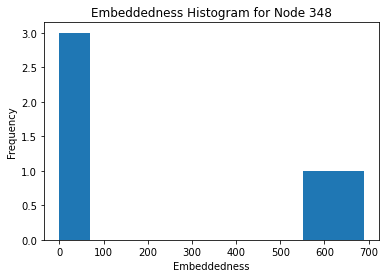

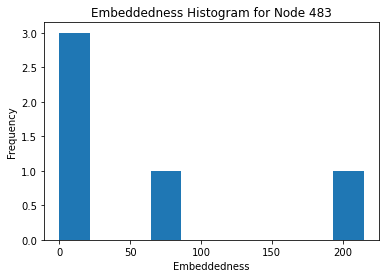

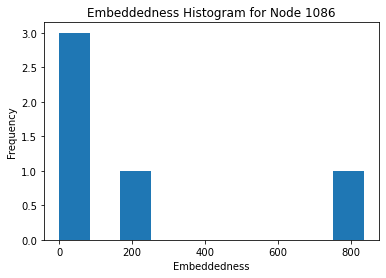

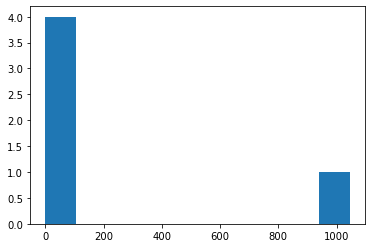

In [8]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_untneighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_co

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value



# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]

for node_id in core_nodes:
    embeddedness_values = []
    dispersion_values = []
    
    for core_id in core_nodes:
        embeddedness_values.append(embeddedness(g, node_id, core_id))
        dispersion_values.append(dispersion(g, node_id, core_id))
    
    # Plot the embeddedness histogram for the current node
    #plt.hist(embeddedness_values, bins=range(0, max(embeddedness_values) + 2))
    plt.title(f"Embeddedness Histogram for Node {node_id}")
    plt.xlabel("Embeddedness")
    plt.ylabel("Frequency")
    plt.show()
    
    # Plot the dispersion histogram for the current node
    plt.hist(dispersion_values,bins=10)


4


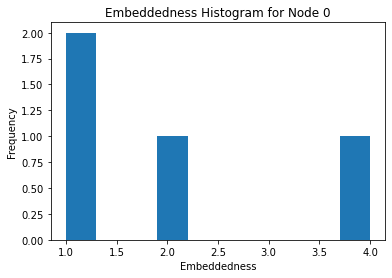

4


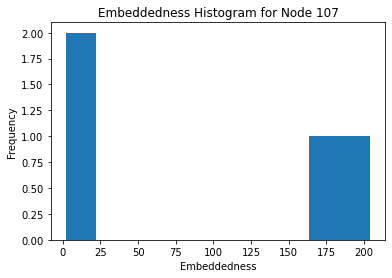

4


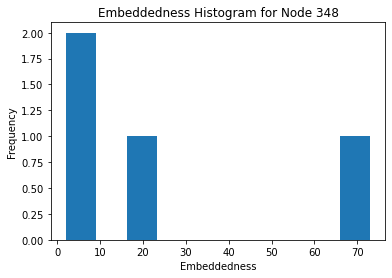

4


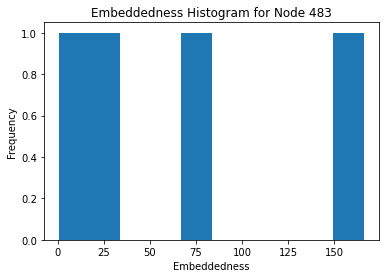

4


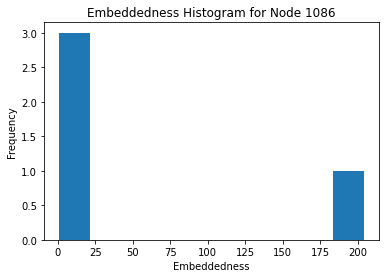

In [29]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    # Implementation of dispersion calculation
    pass

# Read the graph from file
# g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]

for node_id in core_nodes:
    embeddedness_values = []
    dispersion_values = []
    
    for core_id in core_nodes:
        if core_id != node_id:  # Exclude calculating embeddedness between the same node
            embeddedness_values.append(embeddedness(g, node_id, core_id))
            dispersion_values.append(dispersion(g, node_id, core_id))
    print(len(embeddedness_values))
    # Plot the embeddedness histogram for the current node
    plt.hist(embeddedness_values)
    plt.title(f"Embeddedness Histogram for Node {node_id}")
    plt.xlabel("Embeddedness")
    plt.ylabel("Frequency")
    plt.show()
    
    # Plot the dispersion histogram for the current node
    #plt.hist(dispersion_values, bins=10)
    #plt.title(f"Dispersion Histogram for Node {node_id}")
    #plt.xlabel("Dispersion")
    #plt.ylabel("Frequency")
    #plt.show()


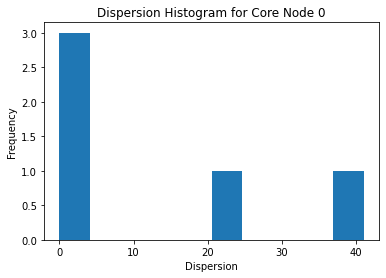

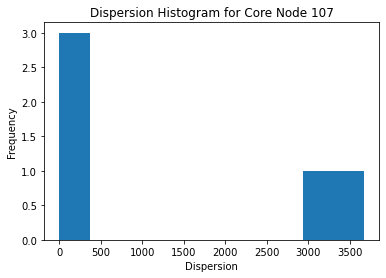

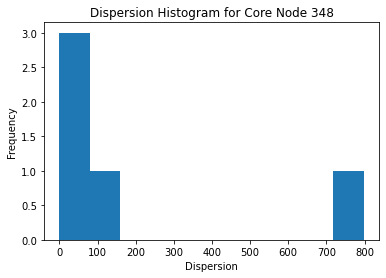

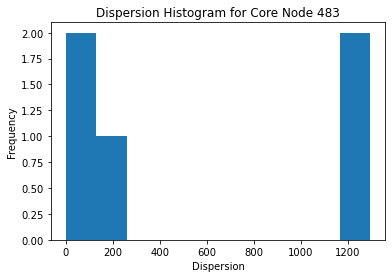

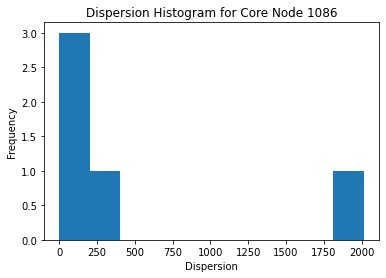

In [124]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value



# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]

for core_node in core_nodes:
    dispersion_values = []
    
    for target_node in core_nodes:
        dispersion_values.append(dispersion(g, target_node, core_node))

    plt.hist(dispersion_values)
    plt.title(f"Dispersion Histogram for Core Node {core_node}")
    plt.xlabel("Dispersion")
    plt.ylabel("Frequency")
    plt.show()


<class 'list'>


AttributeError: 'list' object has no attribute 'apppend'

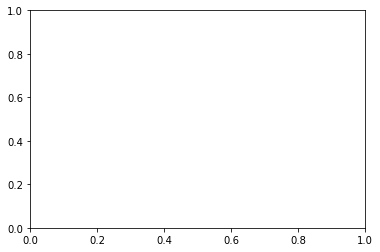

In [141]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value

# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]
pns=[]
fgs=[]
vcss=[]
lay=[]
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    max_disp_node = np.argmax([dispersion(g, target, node) for target in core_nodes])
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    
    # Highlight node with maximum dispersion
    vertex_color[max_disp_node] = max(membership) + 1  # Set a new color
    pns.append(personal_net)
    fgs.append(fg_clusters)
    print(type(vertex_color))
    vcss.apppend(np.array(vertex_color))
    lay.append(layout)
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_community.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout,)


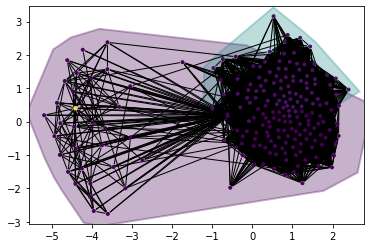

In [12]:
core_nodes = [0, 107, 348, 483, 1086]
node = 1086
personal_net = g.subgraph(g.neighborhood(node, order=1))
fg_clusters = personal_net.community_fastgreedy().as_clustering()
max_disp_node = np.argmax([dispersion(g, target, node) for target in core_nodes])

layout = personal_net.layout("fr")

fig, ax = plt.subplots()
membership = fg_clusters.membership
vertex_color = [membership[vertex.index] for vertex in personal_net.vs]

# Highlight node with maximum dispersion
vertex_color[max_disp_node] = max(membership) + 25  # Set a new color

igraph.plot(personal_net, mark_groups=fg_clusters, target=ax, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout,)


In [150]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value

# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]

for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    
    # Calculate embeddedness for each neighbor of the core node
    embeddedness_values = []
    for neighbor in core_nodes:
        if neighbor != node:
            embeddedness_values.append(embeddedness(personal_net, neighbor, node))
    
    # Find the node with maximum dispersion embeddedness (excluding zero embeddedness nodes)
    max_disp_embed_node = np.argmax(embeddedness_values)
    
    max_disp_node = core_nodes[max_disp_embed_node]  # Get the node ID
    
    # Highlight node with maximum dispersion embeddedness
    fg_clusters_graph = fg_clusters.graph
    fg_clusters_graph.vs[max_disp_node]['color'] = 'red'  # Set the color of the node
    
    # Highlight the edges incident to the maximum dispersion embeddedness node
    incident_edges = fg_clusters_graph.incident(fg_clusters_graph.vs[max_disp_node])
    fg_clusters_graph.es[incident_edges]['color'] = 'red'  # Set the color of the edges
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"test_core_node_{node}_community.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # Print the ID of the node with maximum dispersion embeddedness
    print(f"Node ID with Maximum Dispersion Embeddedness for Core Node {node}: {max_disp_node}")


InternalError: Error at src/graph/type_indexededgelist.c:770: Given vertex is not in the graph. -- Invalid vertex id

2
0
4
1
3
2
1
3
1
4


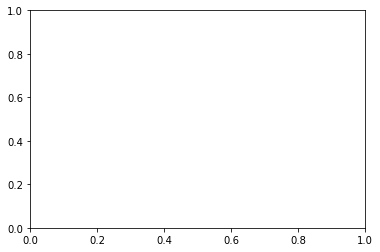

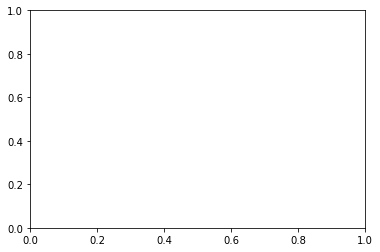

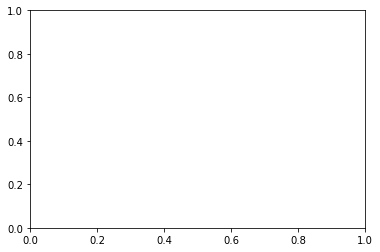

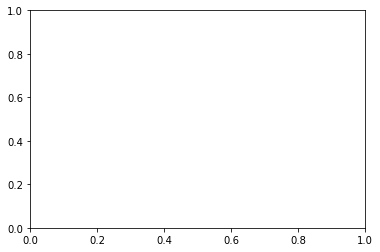

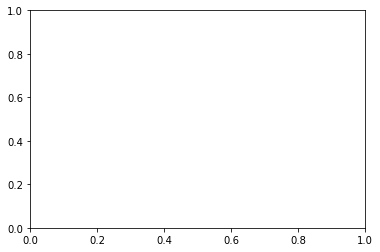

In [26]:
node = 1086
core_nodes = [0, 107, 348, 483, 1086]
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    max_disp_node = np.argmax([dispersion(g, target, node) for target in core_nodes])
    max_embed_node = np.argmax([embeddedness(g, target, node) for target in core_nodes])

    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]

    # Highlight node with maximum dispersion
    vertex_color[max_disp_node] = max(membership) + 25  # Set a new color

    # Highlight node with highest embeddedness
    vertex_color[max_embed_node] = max(membership) +35# Set a different color
    print(max_disp_node)
    print(max_embed_node)
    #igraph.plot(personal_net, mark_groups=fg_clusters, target=ax, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)